In [1]:
import time
import imutils
import cv2
import os
import base64
from io import BytesIO
from PIL import Image
import numpy as np
from mimetypes import guess_extension, guess_type
import matplotlib.pyplot as plt

In [2]:
MIN_SUBMIT_IMG_SIZE = 50
VALID_IMG_FORMAT = ["jpg", "jpeg", "png", "gif", "webp", "bmp"]
VALID_IMG_TYPE = ['image/jpeg', 'image/png', 'image/gif', 'image/webp', 'image/jpg']

def convert_cv_image_to_base64(img, imread=False, ext="jpeg"):
    if ext.lower() not in VALID_IMG_FORMAT:
        return None

    try:
        if imread == True:
            img = cv2.imread(img)

        _, im_arr = cv2.imencode(".{0}".format(ext.lower()), img)
        im_bytes = im_arr.tobytes()
        im_b64 = base64.b64encode(im_bytes)
        return "data:image/{0};base64,{1}".format(ext.lower(), im_b64.decode("utf-8"))
    except:
        pass
    
    return None

def convert_pil_image_to_base64(img, imread=False, ext="jpeg"):
    if ext.lower() not in VALID_IMG_FORMAT:
        return None

    try:
        if imread == True:
            img = Image.open(img)

        im_file = BytesIO()
        img.save(im_file, format=("{0}".format(ext.upper())))
        im_bytes = im_file.getvalue()
        im_b64 = base64.b64encode(im_bytes)
        return "data:image/{0};base64,{1}".format(ext.lower(), im_b64.decode("utf-8"))
    except:
        pass
    
    return None

def convert_base64_to_pil_image(im_b64):
    if check_valid_image(im_b64) == False:
        return None

    arr_im_b64 = im_b64.split(",")
    if len(arr_im_b64) < 1:
        return None

    try:
        im_bytes = base64.b64decode(arr_im_b64[1])
        im_file = BytesIO(im_bytes)
        img = Image.open(im_file)
        
        width, height = img.size
        if (width < MIN_SUBMIT_IMG_SIZE) or (height < MIN_SUBMIT_IMG_SIZE):
            return None
        return img
    except:
        pass
    
    return None

def convert_base64_to_cv_image(im_b64):
    if check_valid_image(im_b64) == False:
        return None

    arr_im_b64 = im_b64.split(",")
    if len(arr_im_b64) < 1:
        return None

    try:
        im_bytes = base64.b64decode(arr_im_b64[1])
        im_arr = np.frombuffer(im_bytes, dtype=np.uint8)
        img = cv2.imdecode(im_arr, flags=cv2.IMREAD_COLOR)
        
        (height, width, _channel) = img.shape
        if (width < MIN_SUBMIT_IMG_SIZE) or (height < MIN_SUBMIT_IMG_SIZE):
            return None
        return img
    except:
        pass
    
    return None

def convert_cv2_img_to_pil_img(img, channel="RGB"):
    try:
        img = Image.fromarray(img, channel)
        return img
    except:
        return None
    
def check_valid_image(img):
    """
    img: imgbase64, filename, path or URL
    """
    try:
        ext = guess_extension(guess_type(img)[0])
        if ext is None:
            return False
        ext = ext.strip()
        if len(ext) == 0:
            return False
        ext = ext.replace(".", "")
        if ext.lower() in VALID_IMG_FORMAT:
            return True
    except:
        pass
    
    return False

In [3]:
import requests
import logging

class InternalHttpClient():
    def __init__(self, host, timeout=60):
        self.host = host
        self.timeout = timeout

    def build_url(self, uri):
        return "{}/{}".format(self.host, uri)

    def get(self, uri, payload):
        url = self.build_url(uri)
        try:
            r = requests.get(url, params=payload, timeout=self.timeout)
            if r.status_code == requests.codes.ok:
                return r.json()
        except Exception as e:
            logging.error('ihttp GET => Error : {}'.format(e.__str__()))
            pass
        return None

    def post(self, uri, payload):
        url = self.build_url(uri)
        print(url)
        try:
            r = requests.post(url, data=payload, timeout=self.timeout)
            if r.status_code == requests.codes.ok:
                return r.json()
        except Exception as e:
            logging.error('ihttp POST => Error : {}'.format(e.__str__()))
            pass
        return None
    
dev_server = InternalHttpClient('http://192.168.10.145:8085')
production_server = InternalHttpClient('https://mlapi.woka.io')

# Fingerprint

''
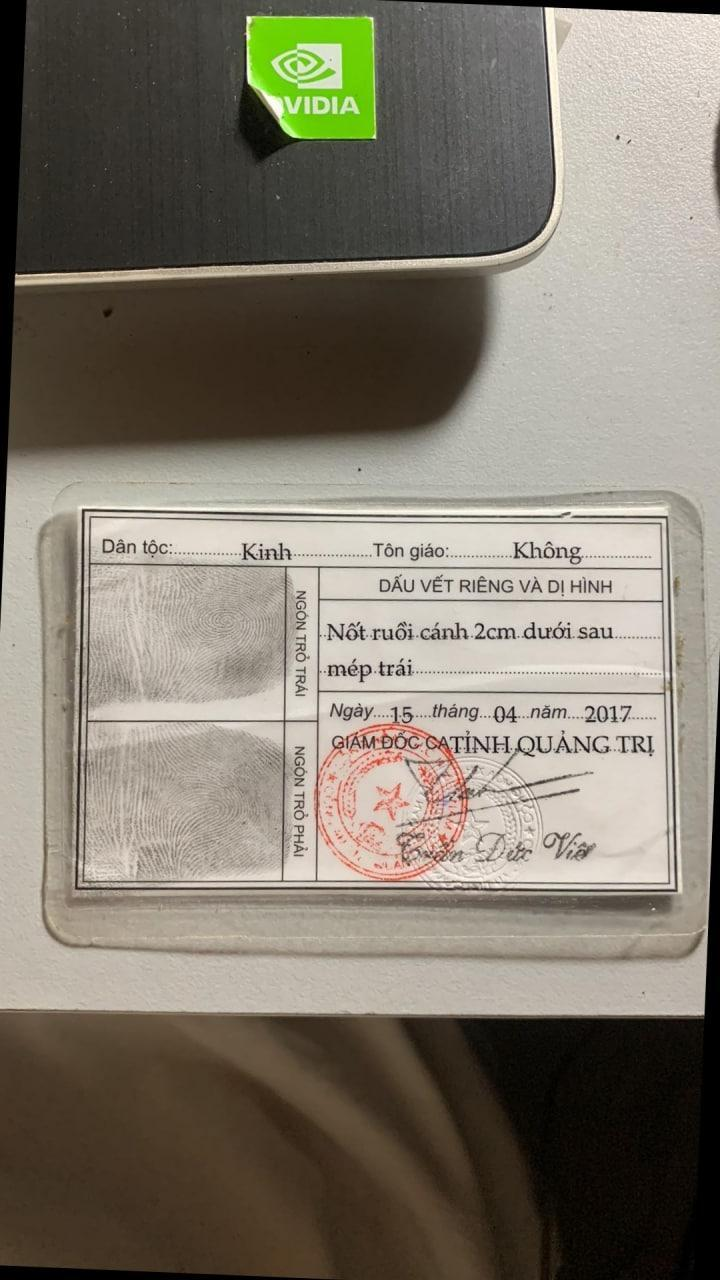

In [4]:
img_path = "/data_science/data_science/data/v1/images/idcard_backside.jpg"
img_base64 = convert_pil_image_to_base64(img_path, True)
img_base64

http://192.168.10.145:8085/api/v1/idcard/vn/fingerprint


{'code': 0,
 'msg': {'data': {'left_fprint': {'imgbase64': '',
    'prob': 0.94067,
    'type': [{'class': 'RL', 'prob': 0.63094},
     {'class': 'UL', 'prob': 0.13305},
     {'class': 'WE', 'prob': 0.11236},
     {'class': 'WCDI', 'prob': 0.08318},
     {'class': 'ARCH', 'prob': 0.01874},
     {'class': 'WPL', 'prob': 0.01457},
     {'class': 'WST', 'prob': 0.00716}]},
   'right_fprint': {'imgbase64': '',
    'prob': 0.94472,
    'type': [{'class': 'UL', 'prob': 0.64179},
     {'class': 'RL', 'prob': 0.12627},
     {'class': 'WE', 'prob': 0.10509},
     {'class': 'WCDI', 'prob': 0.08816},
     {'class': 'ARCH', 'prob': 0.0169},
     {'class': 'WST', 'prob': 0.01113},
     {'class': 'WPL', 'prob': 0.01067}]}},
  'extras': {}}}
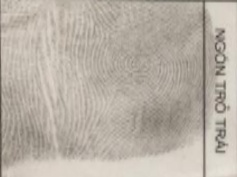
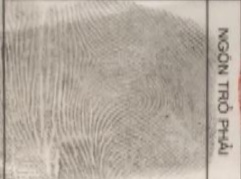

In [5]:
uri = 'api/v1/idcard/vn/fingerprint'
params = {
    'imgbase64': img_base64,
    'apikey': 'b6be081f-93cb-454f-ae63-d5e3fc815c12',
    'classify': 2
}

# resp = dev_server.post(uri, params)
resp = dev_server.post(uri, params)
resp


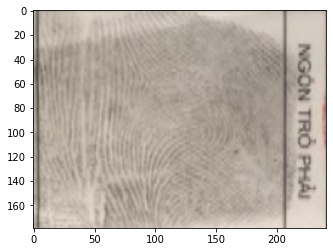

In [6]:
img = convert_base64_to_pil_image(resp["msg"]["data"]["right_fprint"]["imgbase64"])
plt.imshow(img)


# Avatar

In [7]:
# img_path = "/data_science/data_science/data/v1/idcard/bug/image_2022-05-25_09-48-02.png"
# img_base64 = convert_pil_image_to_base64(img_path, True, 'png')
# img = convert_base64_to_pil_image(img_base64)
# plt.imshow(img)

http://192.168.10.145:8085/api/v1/idcard/vn/avatar


{'code': 0,
 'msg': {'data': {'avatar': {'imgbase64': '',
    'prob': 0.96407}},
  'extras': {}}}
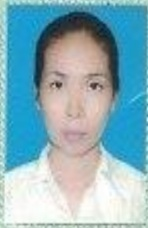

In [8]:
img_path = "/data_science/data_science/data/v1/images/avatar.jpg"
img_base64 = convert_pil_image_to_base64(img_path, True)

uri = 'api/v1/idcard/vn/avatar'
params = {
    'imgbase64': img_base64,
    'apikey': 'b6be081f-93cb-454f-ae63-d5e3fc815c12',    
}

# resp = dev_server.post(uri, params)
resp = dev_server.post(uri, params)
resp

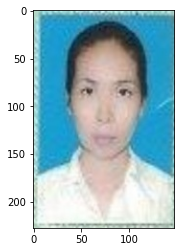

In [9]:
img = convert_base64_to_pil_image(resp["msg"]["data"]["avatar"]["imgbase64"])
plt.imshow(img)


# OCR

In [10]:
uri = 'api/v1/idcard/vn/ocr'
params = {
    'imgbase64': img_base64,
    'apikey': 'b6be081f-93cb-454f-ae63-d5e3fc815c12',    
}

# resp = dev_server.post(uri, params)
resp = dev_server.post(uri, params)
resp

http://192.168.10.145:8085/api/v1/idcard/vn/ocr


{'code': 0,
 'msg': {'data': {'address': '11/4AKP5, PHIAN THỜI NHẤT QUÂN 12 THI MINH',
   'address_1': '11/4AKP5',
   'address_2': 'Phian Thời Nhất Quân 12 Thi Minh',
   'birthday': '10-10-1979',
   'expiry_date': '',
   'home': 'HÀ NAM, ',
   'home_1': 'Hà Nam',
   'home_2': '',
   'id': '023173558',
   'name': 'HOÀNG THỊ PHÚC ',
   'name_1': 'HOÀNG THỊ PHÚC',
   'name_2': '',
   'nationality': '',
   'sex': ''},
  'extras': {}}}